(Mandar Angchekar 386916341)  
Title: Human Sign Language Detection

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image
from sklearn.preprocessing import LabelBinarizer

from sklearn.model_selection import train_test_split

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

from sklearn.metrics import accuracy_score
import pandas as pd



In [59]:
train = pd.read_csv('sign_mnist_train.csv')
test = pd.read_csv('sign_mnist_test.csv')

In [60]:
train.shape

(27455, 785)

In [61]:
labels = train['label'].values
train.drop('label', axis=1, inplace=True)
train.shape

(27455, 784)

In [62]:
lbz = LabelBinarizer()
labels = lbz.fit_transform(labels)
images = train.values
images = np.array([np.reshape(i, (28,28)) for i in images])
images = np.array([i.flatten() for i in images])
# plt.imshow(images[0].reshape(28,28)) 

In [63]:
xtrain, xtest, ytrain, ytest = train_test_split(images, labels, test_size= 0.3, random_state=101)


In [64]:
xtrain = xtrain / 255
xtest = xtest / 255
xtrain = xtrain.reshape(xtrain.shape[0],28,28,1)
xtest = xtest.reshape(xtest.shape[0],28,28,1)

In [65]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(24, activation='softmax')) 

In [66]:
model.compile(loss= keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

model.fit(xtrain,ytrain, validation_data=(xtest,ytest), epochs=20, batch_size=128)

Epoch 1/20
151/151 [==============================] - 19s 122ms/step - loss: 2.6113 - accuracy: 0.1959 - val_loss: 1.7205 - val_accuracy: 0.4819
Epoch 2/20
151/151 [==============================] - 18s 121ms/step - loss: 1.3657 - accuracy: 0.5501 - val_loss: 0.9385 - val_accuracy: 0.7033
Epoch 3/20
151/151 [==============================] - 18s 121ms/step - loss: 0.7901 - accuracy: 0.7340 - val_loss: 0.5408 - val_accuracy: 0.8320
Epoch 4/20
151/151 [==============================] - 19s 126ms/step - loss: 0.5223 - accuracy: 0.8250 - val_loss: 0.3359 - val_accuracy: 0.8935
Epoch 5/20
151/151 [==============================] - 19s 126ms/step - loss: 0.3719 - accuracy: 0.8761 - val_loss: 0.2704 - val_accuracy: 0.9105
Epoch 6/20
151/151 [==============================] - 20s 131ms/step - loss: 0.2648 - accuracy: 0.9121 - val_loss: 0.1788 - val_accuracy: 0.9495
Epoch 7/20
151/151 [==============================] - 18s 122ms/step - loss: 0.1918 - accuracy: 0.9382 - val_loss: 0.0978 - val_ac

In [67]:
test_labels = test['label'].values
test.drop('label', axis=1, inplace=True)
test.shape

(7172, 784)

In [68]:
test_labels = lbz.fit_transform(test_labels)
test_images = test.values
test_images = np.array([np.reshape(i, (28,28)) for i in test_images])
test_images = np.array([i.flatten() for i in test_images])
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)


In [69]:
pred = model.predict(test_images)


225/225 [==============================] - 2s 9ms/step


In [70]:
accuracy_score(test_labels, pred.round())


0.8637757947573899

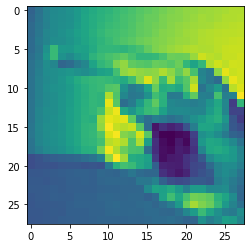

In [77]:
plt.imshow(test_images[25].reshape(28,28))


In [78]:
model.predict(test_images[25].reshape(1,28,28,1))


1/1 [==============================] - 0s 16ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)